In [33]:
import pandas as pd
import numpy as np
df = pd.read_csv('../build/trajectory_log.csv')
print(df.describe())
df

               seq            x            y
count  1280.000000  1280.000000  1280.000000
mean     10.000000  1006.409384  1147.681261
std       5.746808    54.394151    17.110209
min       1.000000   909.782520  1128.716820
25%       5.000000   957.721570  1131.214750
50%      10.000000  1006.498480  1143.138790
75%      15.000000  1052.624530  1162.542620
max      19.000000  1113.478570  1181.533050


,seq,x,y
0,1,909.782520,1128.76585
1,1,910.182954,1128.76268
2,1,910.583567,1128.75951
3,1,910.984356,1128.75637
4,1,911.385322,1128.75327
5,1,911.786463,1128.75021
6,1,912.187779,1128.74721
7,1,912.589270,1128.74429
8,1,912.990934,1128.74144
9,1,913.392771,1128.73869


In [34]:
last_seq = df.seq.values[0]
x=[]
y=[]
last_x = -1e9

df_vehicle = pd.DataFrame({'seq': [], 'x': [], 'y': []})


for (idx,seq) in enumerate(df.seq):
    if seq != last_seq:
        print(last_seq, seq, df.x[idx])
        df_temp = df[ (df['seq'] == last_seq) & (df.x < df.x[idx]) ]
        print(df_temp)
        df_vehicle = df_vehicle.append(df_temp)
        last_seq = seq
        

1 3 910.182954
   seq          x           y
0    1  909.78252  1128.76585
3 5 930.825361
     seq           x           y
128    3  910.182954  1128.76268
129    3  910.583567  1128.75951
130    3  910.984356  1128.75637
131    3  911.385322  1128.75327
132    3  911.786463  1128.75021
133    3  912.187779  1128.74721
134    3  912.589270  1128.74429
135    3  912.990934  1128.74144
136    3  913.392771  1128.73869
137    3  913.794780  1128.73605
138    3  914.196960  1128.73353
139    3  914.599311  1128.73113
140    3  915.001832  1128.72888
141    3  915.404522  1128.72678
142    3  915.807381  1128.72485
143    3  916.210408  1128.72310
144    3  916.613602  1128.72154
145    3  917.016962  1128.72018
146    3  917.420488  1128.71903
147    3  917.824180  1128.71811
148    3  918.228036  1128.71743
149    3  918.632055  1128.71699
150    3  919.036238  1128.71682
151    3  919.440583  1128.71693
152    3  919.845090  1128.71732
153    3  920.249757  1128.71801
154    3  920.65458

In [35]:
len(df_vehicle)
df_vehicle.head(10)

,seq,x,y
0,1.0,909.782520,1128.76585
128,3.0,910.182954,1128.76268
129,3.0,910.583567,1128.75951
130,3.0,910.984356,1128.75637
131,3.0,911.385322,1128.75327
132,3.0,911.786463,1128.75021
133,3.0,912.187779,1128.74721
134,3.0,912.589270,1128.74429
135,3.0,912.990934,1128.74144
136,3.0,913.392771,1128.73869


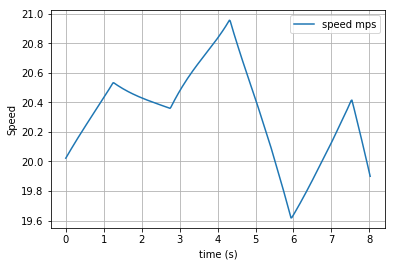

In [36]:
positions = df_vehicle.values[:,1:]
move_vector = np.diff(positions, axis=0)
dT=0.02
speed = np.sqrt(np.sum(move_vector**2, axis=1))/dT 

import matplotlib.pyplot as plt

time=np.linspace(0.0,speed.shape[0]*0.02,num=speed.shape[0])

fig = plt.figure()
ax = plt.subplot(111)
ax.plot(time,speed, label='speed mps')
ax.grid('on')
ax.legend()

ax.set_xlabel('time (s)')
ax.set_ylabel('Speed')

# ax = plt.subplot(122)
# ax.plot(speed * 2.23694, label='speed mph')
# ax.legend()
# ax.grid('on')

plt.show()